# Handwritten Digits

In this notebook I'll continue the idea of exploratory analysis following another Datacamp tutorial: https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python

The dataset used will be the one from UCI Machine Learning Repository to recognition of handwritten digits: http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Concepts
- Exploratory data analysis (EDA): navigate through amounts of data to answer business questions and validate hypothesis
- Data profiling: descriptive statistics that summarize datasets
- Data mining: technique to extract patterns from data. EDA is about finding such patterns

Some of the problems Data Scientists often enconter with datasets are missing data and outliers. Describing the data can help find out missing or corrupted data as plotting the dataset can show outliers.

## Imports

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

## Data preparation

In [7]:
# Load the dataset. This is the training set from UCI
digits_tra = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)

In [8]:
# Summarize descriptive statistics
digits_tra.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,3823.0,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,...,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000
mean,0.0,0.301334,5.481821,11.805912,11.451478,5.505362,1.387392,0.142297,0.002093,1.960502,...,0.148313,0.000262,0.283024,5.855872,11.942977,11.461156,6.700497,2.105676,0.202197,4.497253
std,0.0,0.866986,4.631601,4.259811,4.537556,5.613060,3.371444,1.051598,0.088572,3.052353,...,0.767761,0.016173,0.928046,4.980012,4.334508,4.991934,5.775815,4.028266,1.150694,2.869831
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,15.000000,...,12.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [9]:
# Check the contents of the first five rows
digits_tra.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [10]:
# Check the contents of the last five rows
digits_tra.tail()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
3818,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
3819,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
3820,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
3821,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6
3822,0,0,2,15,16,13,1,0,0,0,...,0,0,0,4,14,1,0,0,0,7


In [13]:
# Get a random sample of five rows to check its contents
digits_tra.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1449,0,3,13,16,4,0,0,0,0,7,...,0,0,4,16,16,16,16,8,0,2
834,0,0,0,10,15,6,0,0,0,0,...,0,0,0,2,12,13,13,1,0,0
871,0,0,9,15,8,2,0,0,0,3,...,0,0,0,10,16,15,12,1,0,9
2046,0,3,15,13,2,0,0,0,0,11,...,0,0,2,13,13,12,12,5,0,2
323,0,0,0,1,16,1,0,0,0,0,...,0,0,0,0,1,14,1,0,0,4


In [21]:
# Check for missing entries in the database
digits_tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 65 columns):
0     3823 non-null int64
1     3823 non-null int64
2     3823 non-null int64
3     3823 non-null int64
4     3823 non-null int64
5     3823 non-null int64
6     3823 non-null int64
7     3823 non-null int64
8     3823 non-null int64
9     3823 non-null int64
10    3823 non-null int64
11    3823 non-null int64
12    3823 non-null int64
13    3823 non-null int64
14    3823 non-null int64
15    3823 non-null int64
16    3823 non-null int64
17    3823 non-null int64
18    3823 non-null int64
19    3823 non-null int64
20    3823 non-null int64
21    3823 non-null int64
22    3823 non-null int64
23    3823 non-null int64
24    3823 non-null int64
25    3823 non-null int64
26    3823 non-null int64
27    3823 non-null int64
28    3823 non-null int64
29    3823 non-null int64
30    3823 non-null int64
31    3823 non-null int64
32    3823 non-null int64
33    3823 non-null int64
34    382

In [62]:
# Create a Principal Component Analysis object to reduce the number of dimensions in the data
pca = PCA(n_components=2)

# Apply the transformation
reduced_data = pca.fit_transform(digits_tra)

# Verify the shape of the returned object
reduced_data.shape

(3823, 2)

In [63]:
# Print the resulting numpy array
print(reduced_data)

[[ 12.65674188  -4.63610309]
 [ 16.82906649 -12.96575566]
 [-19.08072512  10.58294016]
 ..., 
 [ 23.90693766   6.06265514]
 [ 29.17987194  -3.06846845]
 [-25.2313221   11.60863775]]


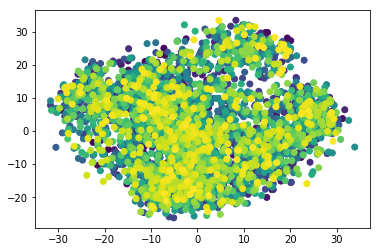

In [119]:
# Show a scatter plot to find correlations between the features
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=np.arange(3823), cmap='viridis')

## Exploratory analysis with different types of data

In [22]:
# Load iris dataset
iris = sns.load_dataset('iris')

In [24]:
# Query entries whose sepal length are smaller than petal lengths
iris.query('sepal_length < petal_length')

,sepal_length,sepal_width,petal_length,petal_width,species


In [32]:
# Transform the target into numerical variables
labels, levels = pd.factorize(iris['species'])

In [33]:
# Insert the numerical values into the dataframe
iris['species_num'] = labels

In [39]:
# Check the new added column
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
116,6.5,3.0,5.5,1.8,virginica,2
96,5.7,2.9,4.2,1.3,versicolor,1
27,5.2,3.5,1.5,0.2,setosa,0
56,6.3,3.3,4.7,1.6,versicolor,1
41,4.5,2.3,1.3,0.3,setosa,0
111,6.4,2.7,5.3,1.9,virginica,2
80,5.5,2.4,3.8,1.1,versicolor,1
135,7.7,3.0,6.1,2.3,virginica,2
94,5.6,2.7,4.2,1.3,versicolor,1
48,5.3,3.7,1.5,0.2,setosa,0


In [125]:
# Verify correlation with Pearson correlation
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_num
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species_num,0.782561,-0.426658,0.949035,0.956547,1.000000


In [126]:
# Verify correlation with Kendall Tau correlation
iris.corr('kendall')

,sepal_length,sepal_width,petal_length,petal_width,species_num
sepal_length,1.000000,-0.076997,0.718516,0.655309,0.670444
sepal_width,-0.076997,1.000000,-0.185994,-0.157126,-0.337614
petal_length,0.718516,-0.185994,1.000000,0.806891,0.822911
petal_width,0.655309,-0.157126,0.806891,1.000000,0.839687
species_num,0.670444,-0.337614,0.822911,0.839687,1.000000


In [127]:
# Verify correlation with Spearman Rank correlation
iris.corr('spearman')

,sepal_length,sepal_width,petal_length,petal_width,species_num
sepal_length,1.000000,-0.166778,0.881898,0.834289,0.798078
sepal_width,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal_length,0.881898,-0.309635,1.000000,0.937667,0.935431
petal_width,0.834289,-0.289032,0.937667,1.000000,0.938179
species_num,0.798078,-0.440290,0.935431,0.938179,1.000000


In [43]:
# Create feature and target variables to be used to learn about the dataset
X = iris.iloc[:,:4]
y = iris.iloc[:,4]

In [46]:
# Build the model
rf = RandomForestClassifier()

In [47]:
# Fit the model to the data
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
# Print the results sorted by the importance of each feature to describe the data
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), iris.dtypes.index.values), reverse=True))

[(0.51039999999999996, 'petal_length'), (0.34320000000000001, 'petal_width'), (0.1222, 'sepal_length'), (0.024199999999999999, 'sepal_width')]
